### Applied Machine Learning
# Logistic Regression

<hr>

## Table of Contents
1. [Hypothesis](#hypothesis)
2. [Sigmoid/Logistic Function](#log_func)
3. [Cost Function](#cost_func)
4. [Data Exploration](#data)
5. [Logistic Regression (scikit)](#log_sci)
6. [Logistic Regression from scratch](#log)
7. [Evaluation of different models](#eval)

In [1]:
# importing libraries 
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt

%matplotlib inline

<a id="hypothesis"></a>
## Hypothesis

Classification (dichotomous) algorithm:

<font size=5>$$ 0 \leq {h_\theta(x)} \leq 1 $$</font>

Representation: 

<font size=5>$$ {h_\theta(x)} = g({\theta^Tx})  $$</font>

<font size=5>$$ {g(z)} = \frac{1}{1+e^{-z}} $$</font>

<font size=3>$$Sigmoid/Logistic \ function $$</font>

Can be rewritten as:

<font size=5>$$ {h_\theta(x)} = \frac{1}{1+e^{-\theta^Tx}}  $$</font>

Conditional Probability:

<font size=5>$$ {P(\hat{y} = 0 | x; \theta)}  +  {P(\hat{y} = 1 | x; \theta)} = 1$$</font>

<font size=5>$$ {P(\hat{y} = 0 | x; \theta)}  = 1 - {P(\hat{y} = 1 | x; \theta)} $$</font>

Predict/Decision Boundary: 

<font size=5>$$ \hat{y} = \begin{cases} 0 & \sigma(\theta^Tx) \geq 0.5 ; \theta^Tx \geq 0 \\ 
1 & \sigma(\theta^Tx) < 0.5 ; \theta^Tx < 0 \end{cases} $$</font>

<a id="log_func"></a>
## Sigmoid/Logistic Function 

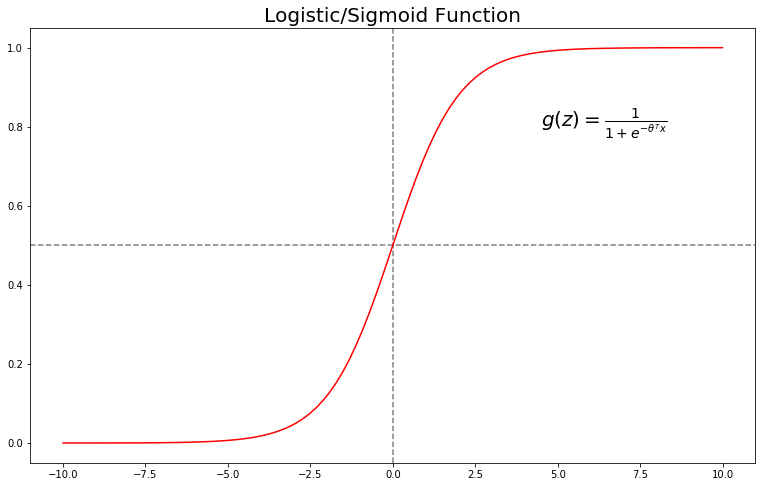

In [2]:
# plotting sigmoid function 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10,10,10)
y = np.linspace(-10,10,100)
plt.figure(figsize=(13,8))
plt.axvline(x=0, color ="black", linestyle="--",alpha=.5)
plt.axhline(y=0.5, color ="black", linestyle="--",alpha=.5)

plt.plot(y, sigmoid(y), "red")
plt.title("Logistic/Sigmoid Function", fontsize=20)
plt.text(4.5, 0.8, r"$g(z)=\frac{1}{1+e^{-\theta^Tx}}$", fontsize=20)
plt.show()

<a id="cost_func"></a>
## Cost Function

As you can see from the previous section ${h_\theta}$ is not a linear function so using MSE as a cost function would give us a non-convex function. Since we cannot differentiate the logistic function and have a non-convex function we would have many local minimas and we would have problems when using gradient descent (no guarantee for convergence). 

So we will be using another cost function which gives as a convex function to work with. 

#### TODO-> Write formulas and show graphs for better intuition + do Dervivatives 

Cost function: 

<font size=5>$$ {Cost(h_\theta(x), y)} = {-y \log(h_\theta(x)) + ((1 - y) \log(1 - h_\theta(x)))} $$</font>

<font size=5>$$ {J(\theta)} = - \frac{1}{m} \sum\limits_{i=1}^{m} {y_i \log h_\theta(x_i) + (1 - y_i) \log(1 - h_\theta(x_i))} $$</font>

<a id="data"></a>
## Data Exploration

In [9]:
# load training dataset 
titanic_train = pd.read_csv("titanic_train.csv")

#titanic_train = titanic_train.dropna()
print(titanic_train.columns)
display(titanic_train.isnull().sum()) # display missing values 
print("Total:", titanic_train.shape[0])

# dropping rows with missing Embarked
titanic_train = titanic_train[pd.notnull(titanic_train["Embarked"])]

# setting missing age to mean 
titanic_age = titanic_train[pd.notnull(titanic_train["Age"])]["Age"]
titanic_age_mean = round(sum(titanic_age) / len(titanic_age))
titanic_train["Age"] = titanic_train["Age"].replace(np.nan, titanic_age_mean)

display(titanic_train.isnull().sum())
print("Total:", titanic_train.shape[0])

# cleaning cabin removing numbers and keeping letters only 
#titanic_train["Cabin"] = titanic_train["Cabin"].str.replace("[^ABCDEFGHIJKLMNOPQRSTUVWXYZ]", "")
#display(titanic_train["Cabin"].value_counts())
#titanic_train["Ticket"] = titanic_train["Ticket"].str.replace("[^ABCDEFGHIJKLMNOPQRSTUVWXYZ]", "")
#display(titanic_train["Ticket"].value_counts())

# encoding categorical columns
encode_columns = ["Sex", "Embarked", "Cabin", "Ticket"]
for column in encode_columns:
    #display(titanic_train[column].value_counts())
    titanic_train[column] = titanic_train[column].astype("category").cat.codes
    #display(titanic_train[column].value_counts())
    
display(titanic_train.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Total: 889


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,522,7.2500,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,595,71.2833,80,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,668,7.9250,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,48,53.1000,54,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,471,8.0500,-1,2


In [4]:
# data exploration 
display(titanic_train["Survived"].value_counts())

count_survived = len(titanic_train[titanic_train["Survived"] == 1])
count_no_survived = len(titanic_train[titanic_train["Survived"] == 0])
perc_survived = count_survived/(count_survived + count_no_survived) * 100
perc_no_survived = count_no_survived/(count_survived + count_no_survived) * 100

# we do have a reasonable ratio to train
print("Survived Percentage:" , perc_survived, "\nNot Survived:" , perc_no_survived)
print("Survive Ratio:", round(perc_survived), ":" , round(perc_no_survived))

0    549
1    340
Name: Survived, dtype: int64

Survived Percentage: 38.24521934758155 
Not Survived: 61.754780652418454
Survive Ratio: 38 : 62


In [5]:
# cabin was left out as too many missing values 
feature_columns = ["Pclass", "Sex", "SibSp", "Age", "Fare", "Embarked"]
X = titanic_train[feature_columns]
y = titanic_train["Survived"]

# splitting training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

# ratio of survive/no survive for training
perc_survived_train = round(sum(1 for x in y_train if x == 1) / y_train.count() * 100)
perc_no_survived_train = round(sum(1 for x in y_train if x == 0) / y_train.count() * 100)
print("Survive Ratio (Train):", perc_survived_train, ":" , perc_no_survived_train)

# ratio of survive/no survive for test
perc_survived_test = round(sum(1 for x in y_test if x == 1) / y_test.count() * 100)
perc_no_survived_test = round(sum(1 for x in y_test if x == 0) / y_test.count() * 100)
print("Survive Ratio (Test):", perc_survived_test, ":" , perc_no_survived_test)

Survive Ratio (Train): 37.0 : 63.0
Survive Ratio (Test): 41.0 : 59.0


<a id="log_sci"></a>
## Logistic Regression (scikit)

In [6]:
# holds references to models for evaluation
# model_list: [model_name, [accuracy, classification_report, confusion_matrix]]
model_list = [("Logistic Regression (scikit)", []),("Logistic Regression", [])]

# maximum iterations
max_iterations = 10000

# logistic regression using scikit 
log_reg = LogisticRegression(max_iter = max_iterations, solver = "lbfgs")
log_reg.fit(X_train, y_train)

# predict the test data
y_pred = log_reg.predict(X_test)

model_list[0][1].append(y_pred) # adding predicted results
model_list[0][1].append(log_reg.score(X_test, y_test)) # adding accuracy 
model_list[0][1].append(classification_report(y_test, y_pred)) # adding classification report 

<a id="log"></a>
## Logistic Regression from scratch

In [7]:
# build logistic regression from scratch 

# cost function 
def logistic_cost(y, h):
    return -np.mean(y * np.log(h) + ((1.0 - y) * np.log(1.0 - h)))

def train_logistic_reg(X, y, alpha, max_epoch, threshold, show_loss = False):
    
    # initialize values
    m = len(y) # total examples
    bias = np.ones((X.shape[0], 1)) # bias/intercept as 1's (x0 = 1)
    X = np.concatenate((bias, X) , axis = 1) # concatenate bias with features
    theta = np.zeros(X.shape[1]) # thetas/weights as 1's

    # gradient descent   
    for curr_epoch in range(max_epoch):        
        z = np.dot(X, theta) # theta Transpose * X
        h = sigmoid(z) # hypothesis
        gradient = np.dot(X.T, (h - y)) / m # calc gradient 
        theta -= alpha * gradient      
        
        if(show_loss and curr_epoch % 1000 == 0):
            print("Loss:", logistic_cost(y, h))
    
    return theta
                    
# predict using logistic regression 
def predict_logistic_reg(X,theta,threshold = 0.5):
    bias = np.ones((X.shape[0], 1)) # bias/intercept as 1's (x0 = 1)
    X = np.concatenate((bias, X) , axis = 1) # concatenate bias with features
    return sigmoid(np.dot(X,theta)) >= threshold 

## hyperparameters
alpha = 0.001 # learning rate
max_epoch = 10000 # maximum iterations
threshold = 0.01 # change threshold to stop iteration (converged)

theta = train_logistic_reg(X_train, y_train, alpha, max_iterations, threshold, True)
y_pred = predict_logistic_reg(X_test, theta)
accuracy = (y_pred == y_test).mean()

model_list[1][1].append(y_pred) # adding predicted results
model_list[1][1].append(accuracy) # adding accuracy 
model_list[1][1].append(classification_report(y_test, y_pred)) # adding classification report 

Loss: 0.6931471805599453
Loss: 0.5970467856404789
Loss: 0.5835534737558349
Loss: 0.5739867546010652
Loss: 0.5660260758736105
Loss: 0.5589726817478582
Loss: 0.552580650165534
Loss: 0.5467401240579072
Loss: 0.541385865429587
Loss: 0.5364694128979335


<a id="eval"></a>
## Evaluation of different models

Model: Logistic Regression (scikit)
Accuracy: 0.792
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83       211
           1       0.78      0.68      0.73       145

   micro avg       0.79      0.79      0.79       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.79      0.79      0.79       356

Confusion Matrix:


Predicted,0,1
Actual,,
0,55,29
1,40,23


ROC Curve


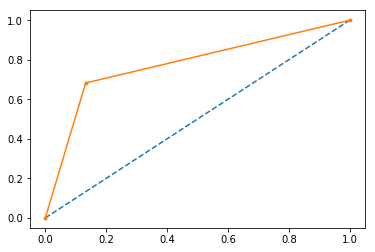

AUC: 0.775


Model: Logistic Regression
Accuracy: 0.702
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.97      0.79       211
           1       0.87      0.32      0.46       145

   micro avg       0.70      0.70      0.70       356
   macro avg       0.77      0.64      0.63       356
weighted avg       0.75      0.70      0.66       356

Confusion Matrix:


Predicted,False,True
Actual,,
0,74,10
1,54,9


ROC Curve


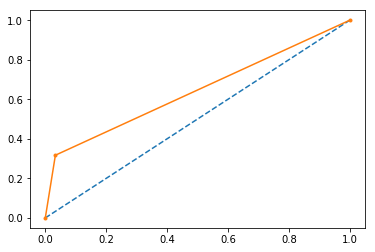

AUC: 0.642




In [8]:
y_actual = pd.Series(y_test, name="Actual")

# comparing values 
for e in model_list: # loop different evaluations
    # model name
    print("Model:", e[0])
    
    # model accuracy
    print("Accuracy: %0.3f" % e[1][1])
    
    # classification report
    print("Classification Report:", e[1][2])

    # confusion matrix 
    y_pred = pd.Series(e[1][0], name = "Predicted")
    df_confusion = pd.crosstab(y_actual, y_pred)
    print("Confusion Matrix:")
    display(df_confusion)
    
    # ROC
    print("ROC Curve")
    fpr, tpr, thresholds = roc_curve(y_test, e[1][0])
    plt.plot([0,1],[0,1], linestyle="--")
    plt.plot(fpr,tpr,marker=".")
    plt.show()
    
    # AUC
    auc = roc_auc_score(y_test, e[1][0])
    print("AUC: %0.3f" % auc)

    print("\n")
